# Bank Marketing Campaign- Predicting Term Deposit (CRISP-DM)

## Problem Definition:

* One of the most common marketing strategy In Banking sector is direct marketing campaigns through phone calls ,it is a form of advertising that allows organizations to communicate directly with customers to offer their services based on the client’s existing bank profile .Here we will consider term deposit as a banking service .

### Direct marketing has significant challenges:

* The increasing number of marketing campaigns over time has reduced their effects on the general public.
* According to study positive response rates of direct marketing tend to be around 1-3%
* Startegy like Telemarketing may have high financial and resource costs, but less ROI
* Many people find direct marketing annoying and intrusive.
* If we reach a consumer who isn't interested in services, they are likely to find it irritating and this can create a negative brand association.

# Business Goal :
#### To build a list of target customers who are likey to subscribe a term deposite. The more targeted our campaigns, the more successful they are likely to be.

## Project Objective :
#### We will convert this problem into a machine learning classification problem . We will build a model to predict whether a client will subscribe a term deposit or not so that the banks can arrange a better management of available resources by focusing on the potential customers “predicted” by the classifier .This will help them to design a more efficient and precise campaign strategy to reduce the costs,improve the profits and customer satisfaction .

## Exploratory Data Analysis

In [1]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats

In [2]:
df=pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# no null value present in the data set

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
# renameing 'y' as 'target'

In [11]:
df=df.rename(columns={'y':'target'})

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

## Visualizing Categorical Variables

<AxesSubplot:xlabel='target', ylabel='count'>

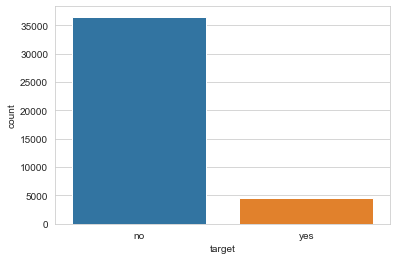

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

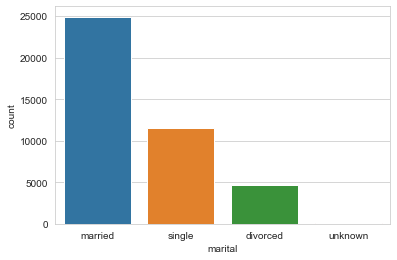

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

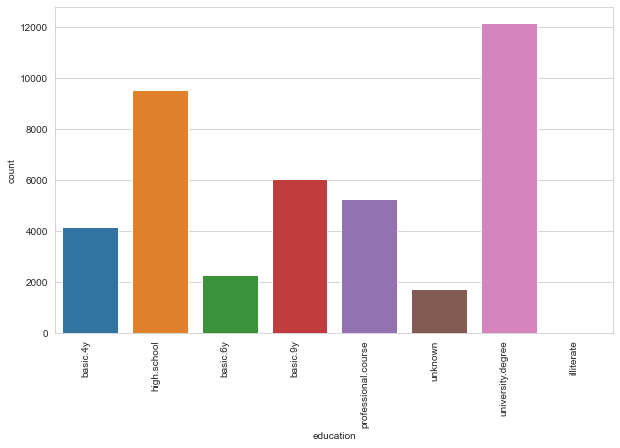

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df)
plt.xticks(rotation=90, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

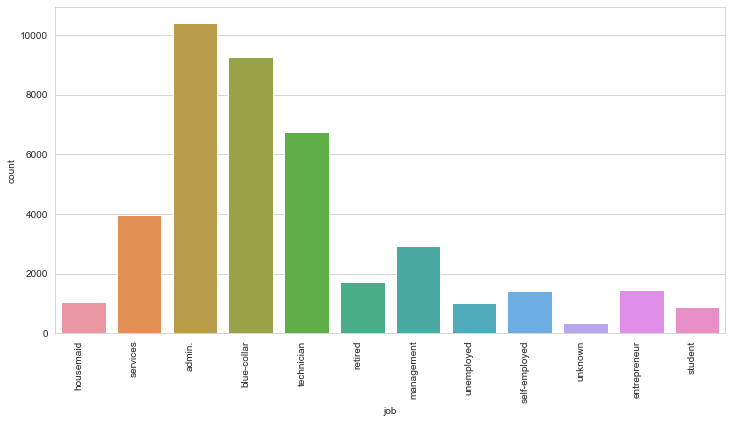

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="job",data=df)
plt.xticks(rotation=90, horizontalalignment='right')

Text(0.5, 0, 'default')

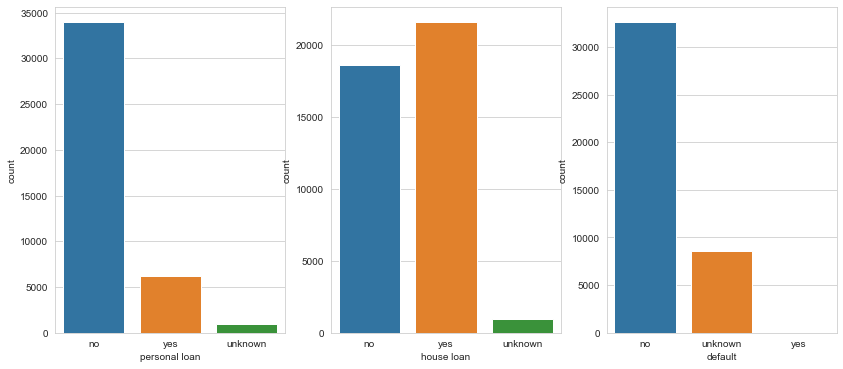

In [18]:
fig,(ax1,ax2,ax3) =plt.subplots(nrows = 1, ncols = 3,figsize=(14,6))
sns.countplot(x="loan",data=df,ax=ax1)
ax1.set_xlabel('personal loan')
sns.countplot(x="housing",data=df,ax=ax2)
ax2.set_xlabel('house loan')
sns.countplot(x="default",data=df,ax=ax3)
ax3.set_xlabel('default')

Text(0.5, 0, 'previous outcome')

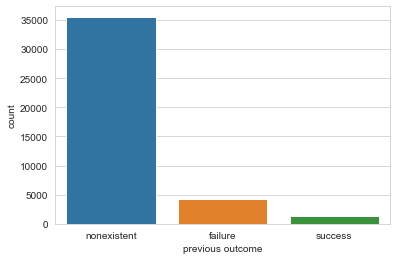

In [19]:
fig,ax=plt.subplots()
sns.countplot(x="poutcome",data=df)
ax.set_xlabel('previous outcome')

Text(0.5, 0, 'contcat type')

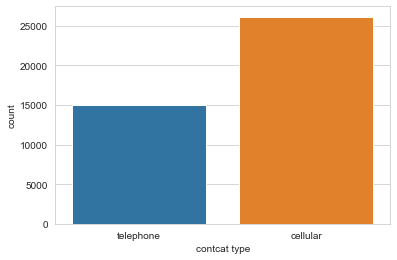

In [20]:
fig,ax=plt.subplots()
sns.countplot(x="contact",data=df)
ax.set_xlabel("contcat type")

<AxesSubplot:xlabel='month', ylabel='count'>

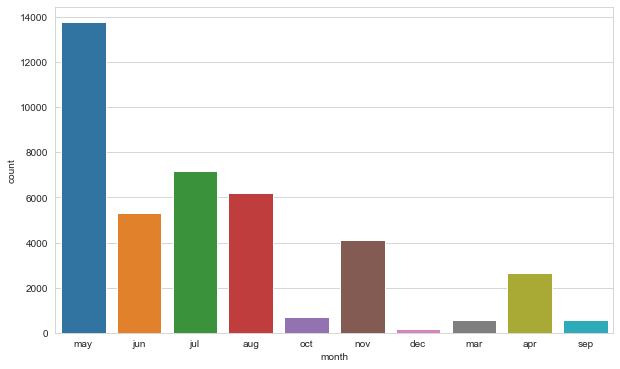

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="month",data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

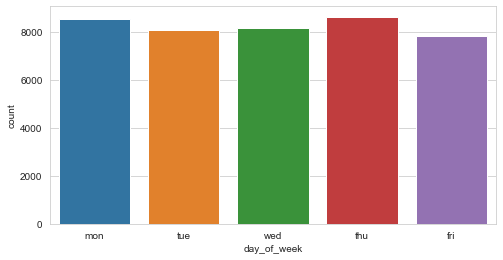

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x="day_of_week",data=df)

## Visualizing Numerical Variable

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

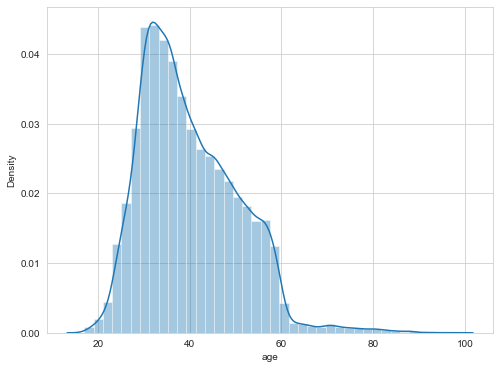

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=40)

In [24]:
df['age'].describe()


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

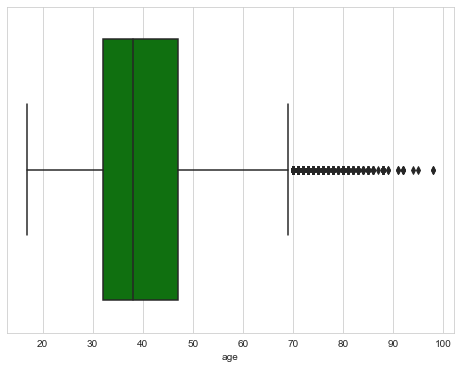

In [25]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='age', data=df,color='green')

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

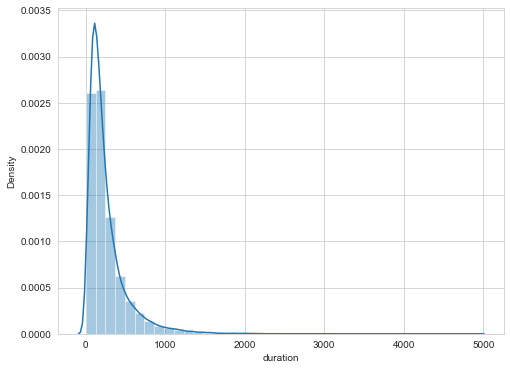

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(df['duration'],bins=40)

In [27]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

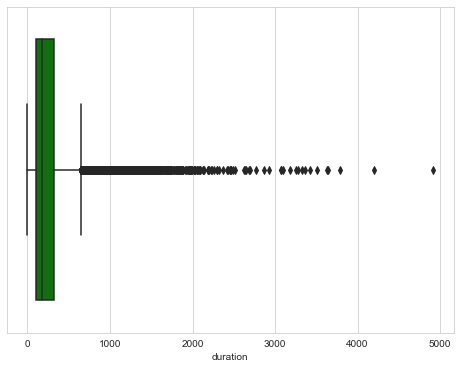

In [28]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='duration', data=df,color='green')

In [29]:
#converting target variable in 0 for no and 1 for yes
df['target']=df['target'].replace({'no':0,'yes':1})

In [30]:
df["target"].value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [31]:
## Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

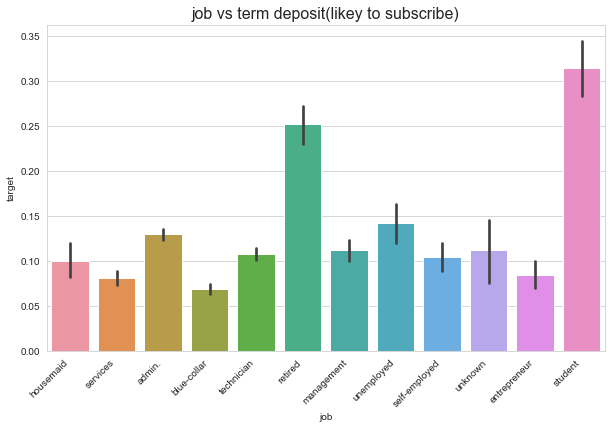

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=df)
plt.title('job vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

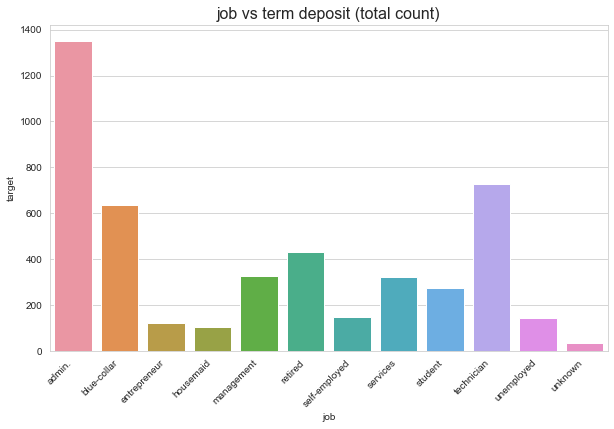

In [33]:
df1 = df.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('job vs term deposit (total count)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [34]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term deposit(likey to subscribe)')

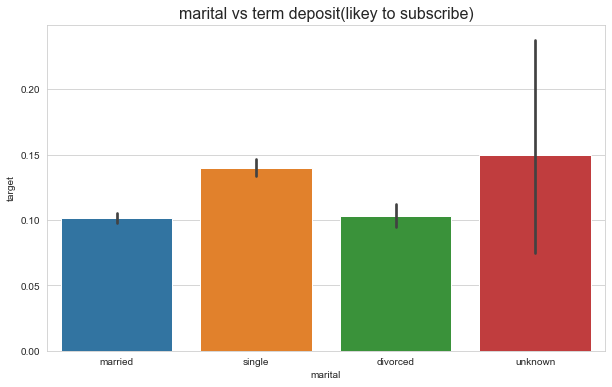

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital', y='target', data=df)
plt.title('marital vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'marital vs term deposit (total count)')

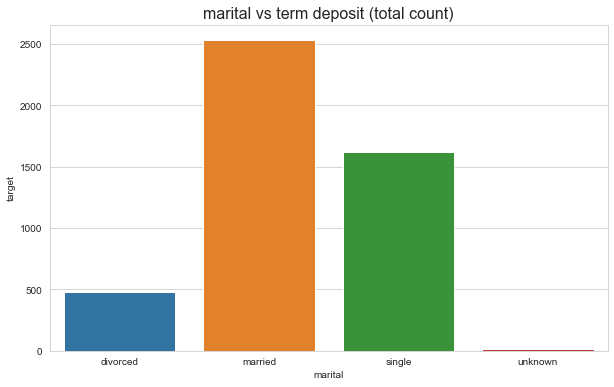

In [36]:
df1 = df.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('marital vs term deposit (total count)',fontsize=16)

In [37]:
df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0.5, 1.0, 'education vs term deposit(likey to subscribe)')

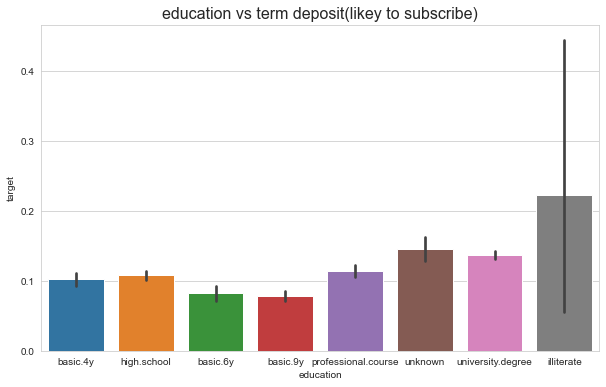

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=df)
plt.title('education vs term deposit(likey to subscribe)',fontsize=16)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

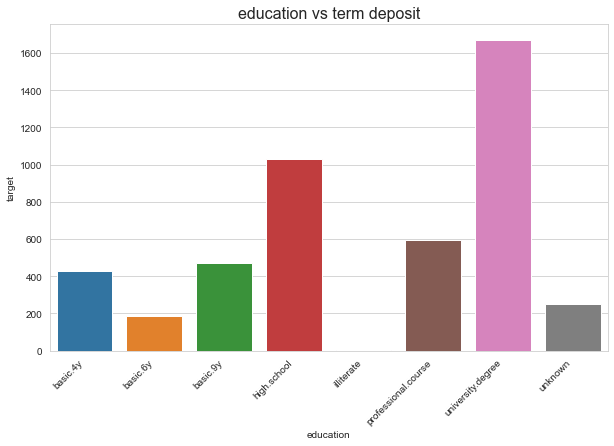

In [39]:
df1 = df.groupby('education').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('education vs term deposit',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [40]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

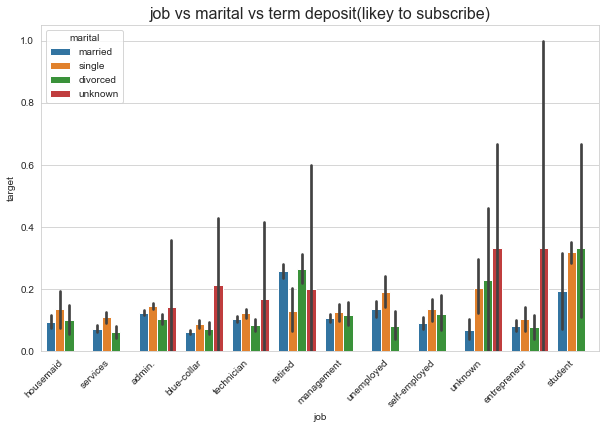

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', hue='marital',data=df)
plt.title('job vs marital vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

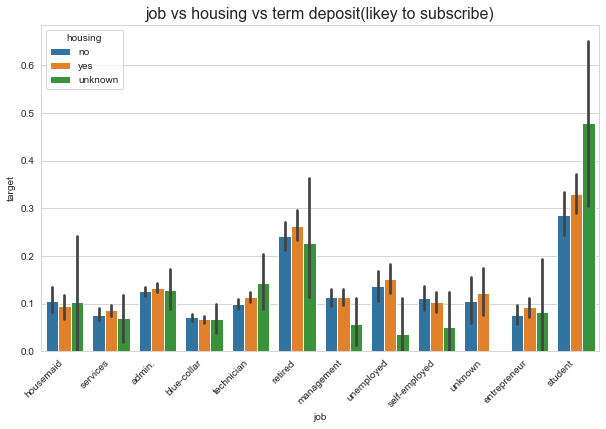

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target',hue='housing', data=df)
plt.title('job vs housing vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

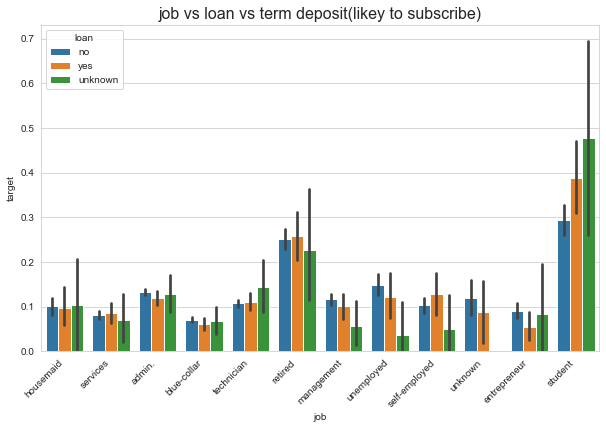

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target',hue='loan', data=df)
plt.title('job vs loan vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'month vs term deposit(likey to subscribe)')

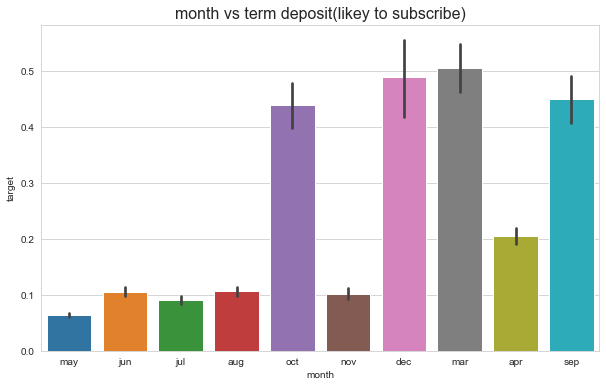

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='target', data=df)
plt.title('month vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'month vs term deposit (total)')

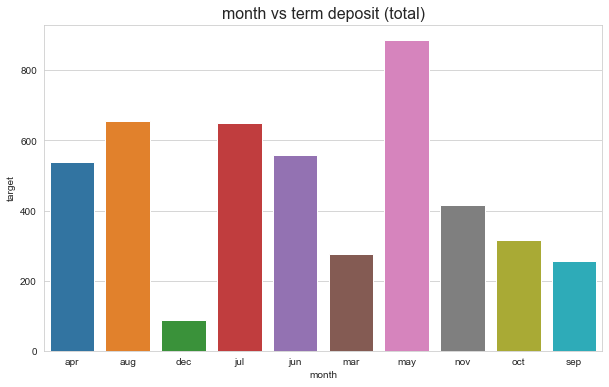

In [45]:
df1 = df.groupby('month').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('month vs term deposit (total)',fontsize=16)

In [46]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'day_of_week vs term deposit(likey to subscribe)')

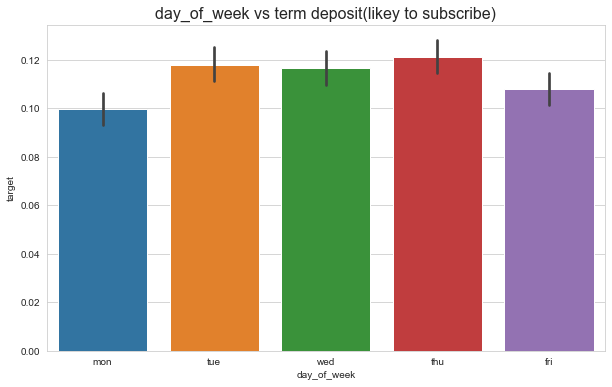

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='target', data=df)
plt.title('day_of_week vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'day_of_week vs term deposit (total)')

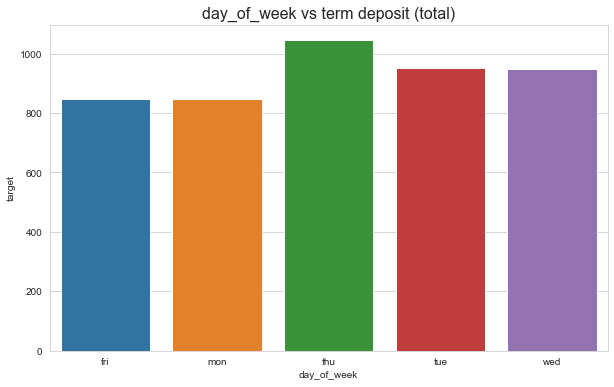

In [48]:
df1 = df.groupby('day_of_week').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('day_of_week vs term deposit (total)',fontsize=16)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0.5, 1.0, 'correlation matrix for numerical variables')

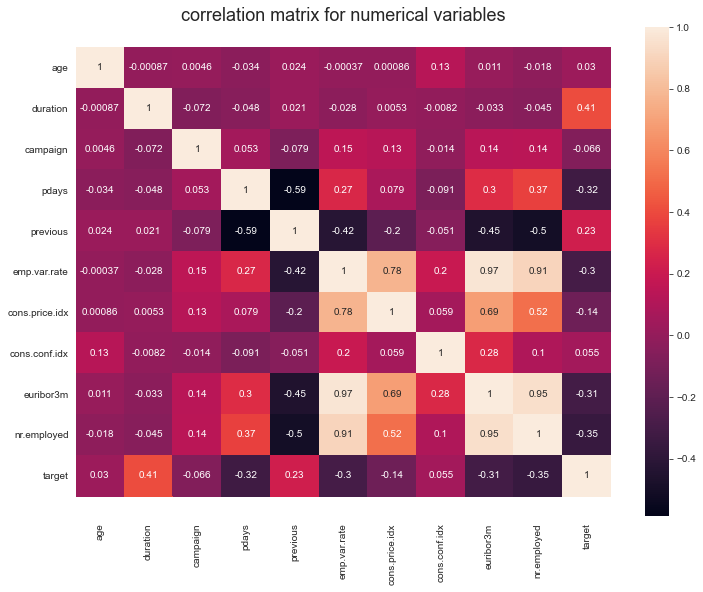

In [50]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat,annot=True,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('correlation matrix for numerical variables',fontsize=18)

### Observations :
* 'emp.var.rate', 'cons.price.idx' , 'cons.conf.idx' , 'euribor3m' , and 'nr.employed' are highly correlated , we can not drop any of them without advise from domain expert ,may be we can do PCA on these varibales in later stage

### Data Preparation
#### We have to drop the 'duration' column beacuse the duration will be unknown before a call is performed so in training dataset we can not keep this, moreover after the the call anhow the outcome will be known

In [51]:
df=df.drop('duration',axis=1)

In [52]:
df.shape

(41188, 20)

In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [54]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [55]:
# in pdays 39673 values are 999 which means client was not previously contacted, and the range for other values is
# 3-27 and count is significantly low , now we can not keep this coulmn like this ,it will add bias to our model , 
#so we will convert this coulm as categorical column

In [56]:
df['pdays_cat'] =['cont' if each==999 else 'not_cont' for each in df.pdays]

In [57]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont


In [58]:
df.pdays_cat.value_counts()

cont        39673
not_cont     1515
Name: pdays_cat, dtype: int64

In [59]:
df=df.drop(['pdays'], axis=1)

In [60]:
df.shape

(41188, 20)

### separating categorical variable

In [61]:
cat_columns_df=df.select_dtypes(include=['object'])

In [62]:
cat_columns_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,pdays_cat
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,cont
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,cont
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,cont
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,cont
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,cont
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,cont
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,cont
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont


In [63]:
### separating numerical value

In [64]:
num_columns_df=df.select_dtypes(exclude=['object'])

In [65]:
num_columns_df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [66]:
num_columns_df = num_columns_df.drop('target',axis=1)
num_columns_df.shape

(41188, 8)

In [67]:
num_columns_df.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [68]:
#creating test data set 
df_test=df.target.astype(dtype='bool')

In [69]:
df_test.shape

(41188,)

In [70]:
df_test.dtype

dtype('bool')

In [71]:
### creating dummy variables form categorical varibales

In [72]:
dummy_columns_df=pd.get_dummies(cat_columns_df,drop_first=True)
dummy_columns_df.shape

(41188, 44)

In [73]:
### scaling numerical variables

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns_scaled_df=pd.DataFrame(scaler.fit_transform(num_columns_df),columns=num_columns_df.columns)

In [75]:
num_columns_scaled_df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


#### Creating Train Data set

In [76]:
#pd.concat()

In [77]:
dummy_columns_df.index

RangeIndex(start=0, stop=41188, step=1)

In [78]:
num_columns_scaled_df.index

RangeIndex(start=0, stop=41188, step=1)

In [79]:
#df_train1 = pd.concat([num_columns_scaled_df, dummy_columns_df], axis=1,sort=False)
df_train = pd.concat([num_columns_scaled_df, dummy_columns_df], axis=1)
df_train
#df_train1

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_cat_not_cont
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,1,0,0,0,0,0,0,1,0,0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0


In [80]:
#df_train1

In [81]:
df_train.shape

(41188, 52)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.2,random_state=101)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 52)
(8238, 52)
(32950,)
(8238,)


#### Handling Imbalance Data

In [84]:
from collections import Counter
print(Counter(y_train))
## Yes : 88.82 % No : 11.17 %

Counter({False: 29269, True: 3681})


### We will use Random Oversampling technique to balance the data , this method randomly selectes examples from the minority class, with replacement, and adding them to the training dataset.¶


In [85]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [86]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [87]:
X_train_os.shape,y_train_os.shape

((58538, 52), (58538,))

In [88]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({False: 29269, True: 3681})
Counter({False: 29269, True: 29269})


## Model and Evaluation
### Model used:

#### K-Nearest Neighbor
#### Decision Tree

### Evaluation metrics :

#### Accuracy Score
#### F1 Score
#### Precision Score
#### Recall Score
#### ROC AUC Score

### Evaluation method :
### As this is a classification problem we will mainly consider the F1 and ROC AUC score
### Satisfactory Recall Score : Our objective will be reducing False Negetive count,we can not miss out our potential customer ##

In [89]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score, recall_score

In [90]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_weighted= metrics.f1_score(x,y,average='weighted')
#    F1_macro= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 weighted score is :',F1_weighted )
#    print('F1 macro score is :',F1_macro )
    print('precision score is :',precision )
    print('recall score is :',recall )
    ax = sns.heatmap(cm,annot=True,cmap='plasma',fmt='g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix',fontsize=16)

In [91]:
## Knn Classifier

In [92]:
from  sklearn.neighbors import KNeighborsClassifier
scores = []
recall = []
for k in range(1,25,2) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_os,y_train_os)
    y_pred=knn.predict(X_test)
    scores.append(metrics.recall_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

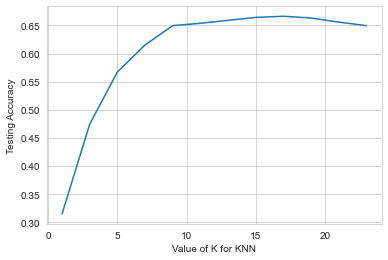

In [93]:
plt.plot(range(1,25,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

accuracy score is : 0.7146151978635591
F1 weighted score is : 0.7623170657892812
precision score is : 0.23271889400921658
recall score is : 0.6319082377476538


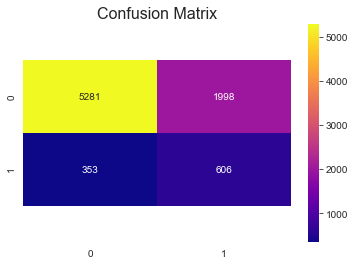

In [94]:
#will consider the optimun k value as 14 
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_os,y_train_os)
y_predKNN=knn.predict(X_test)
classification_metrics(y_test,y_predKNN)

In [95]:
X_test.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_cat_not_cont
3669,-0.769980,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.713613,0.331680,0,0,...,0,0,0,0,0,0,0,1,0,0
20131,1.628993,-0.204909,-0.349494,0.839061,-0.227465,0.951267,0.774728,0.845170,0,0,...,0,0,0,1,0,0,0,1,0,0
2492,-0.674021,0.156105,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,0,0,...,0,0,0,0,0,1,0,1,0,0
14088,-1.057857,-0.204909,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,1,0,...,0,0,0,1,0,0,0,1,0,0
34986,-1.249775,0.878132,-0.349494,-1.197935,-1.179380,-1.231034,-1.367190,-0.940281,1,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
X_test.iloc[:,1]

3669    -0.565922
20131   -0.204909
2492     0.156105
14088   -0.204909
34986    0.878132
           ...   
21321    2.683199
6295     1.239145
3627    -0.204909
27617   -0.204909
9811     1.961172
Name: campaign, Length: 8238, dtype: float64

In [97]:
y_test

3669     False
20131    False
2492     False
14088    False
34986    False
         ...  
21321    False
6295     False
3627     False
27617    False
9811      True
Name: target, Length: 8238, dtype: bool

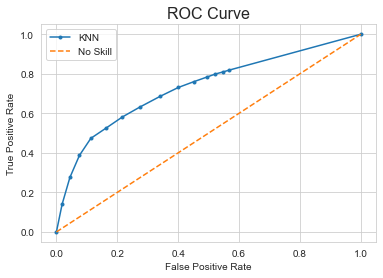

AUC ROC score is : 0.678709991933313


In [98]:
KNN_probs = knn.predict_proba(X_test)[:,1]
NS_probs = [0 for i in range(len(y_test))]
knn_fpr, knn_tpr, i = roc_curve(y_test, KNN_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predKNN))

## Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_os,y_train_os)
y_predDT=DT.predict(X_test)

accuracy score is : 0.8389172129157563
F1 weighted score is : 0.8395306501313801
precision score is : 0.3114754098360656
recall score is : 0.3169968717413973


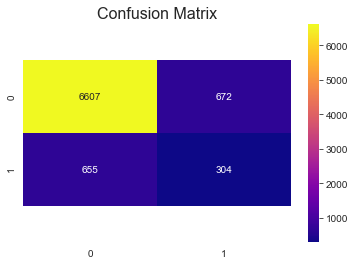

In [100]:
classification_metrics(y_test,y_predDT)


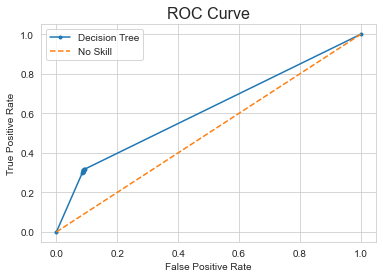

AUC ROC score is : 0.6123382490318472


In [101]:
DT_probs = DT.predict_proba(X_test)[:,1]
NS_probs = [0 for i in range(len(y_test))]
dt_fpr, dt_tpr, i = roc_curve(y_test, DT_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predDT))

### Future Scope: manipulating Threshold Value, Hyper Parameter Tuning.